# DenseNet-121 Fine-Tuning - Bone Fracture Detection

## Module 3: Deep Learning Fine-Tuning

Complete DenseNet-121 fine-tuning pipeline with two-phase training on Google Colab GPU.

## Features:
- ✅ Free GPU access (T4, 16GB VRAM)
- ✅ Upload dataset from PC
- ✅ Two-phase fine-tuning (Classifier + Full model)
- ✅ Automatic model download
- ✅ Training visualization and metrics


In [ ]:
# Install dependencies for DenseNet fine-tuning
%pip install torch torchvision --index-url https://download.pytorch.org/whl/cu118 -q
%pip install scikit-learn pandas matplotlib seaborn tqdm opencv-python opencv-contrib-python scikit-image scipy -q

print("✅ Dependencies installed!")


✅ Dependencies installed!


In [ ]:
# Check GPU/CPU
import torch
print("="*60)
print("DEVICE INFORMATION")
print("="*60)

if torch.cuda.is_available():
    print(f"✅ CUDA Available: True")
    print(f"GPU Name: {torch.cuda.get_device_name(0)}")
    vram_gb = torch.cuda.get_device_properties(0).total_memory / 1e9
    print(f"VRAM: {vram_gb:.2f} GB")
    print("✅ GPU is ready for fine-tuning!")
    device_type = "GPU"
    batch_size = 16 if vram_gb >= 8 else 8
else:
    print("ℹ️  CUDA Available: False")
    print("✅ CPU mode enabled - Training will work but will be slower")
    print("💡 Tip: For faster training, go to Runtime > Change runtime type > GPU (T4)")
    device_type = "CPU"
    batch_size = 4
print("="*60)


DEVICE INFORMATION
✅ CUDA Available: True
GPU Name: Tesla T4
VRAM: 15.83 GB
✅ GPU is ready for fine-tuning!


## Step 2: Upload Dataset from PC

Choose one option to upload your dataset:


In [ ]:
# Option A: Upload Dataset ZIP from PC
from google.colab import files
from pathlib import Path
import zipfile
import os

print("="*80)
print("UPLOAD DATASET FROM PC")
print("="*80)
print("📁 Select your dataset ZIP file...")
print("   (Should contain: train/, valid/, test/ folders with images and labels)")
print("="*80)

uploaded = files.upload()

# Create project directory
project_dir = Path('/content/bone_fracture_detection')
project_dir.mkdir(exist_ok=True)
data_dir = project_dir / 'data' / 'archive'
data_dir.mkdir(parents=True, exist_ok=True)

for filename in uploaded.keys():
    print(f"\n✅ Uploaded: {filename}")

    # Extract if ZIP
    if filename.endswith('.zip'):
        print(f"📦 Extracting {filename}...")
        with zipfile.ZipFile(filename, 'r') as zip_ref:
            zip_ref.extractall(data_dir)
        print(f"✅ Extracted to: {data_dir}")

        # Find the dataset folder
        extracted_folders = [f for f in data_dir.iterdir() if f.is_dir()]
        if extracted_folders:
            dataset_folder = extracted_folders[0]
            print(f"✅ Dataset folder found: {dataset_folder.name}")
    else:
        print(f"⚠️  Please upload a ZIP file")

# Check if dataset exists
dataset_path = data_dir / "bone fracture detection.v4-v4.yolov8"
if not dataset_path.exists():
    # Try to find any folder with data.yaml
    for folder in data_dir.rglob("data.yaml"):
        dataset_path = folder.parent
        print(f"✅ Found dataset at: {dataset_path}")
        break

if dataset_path.exists() and (dataset_path / "data.yaml").exists():
    print(f"\n✅ Dataset ready at: {dataset_path}")
    print(f"✅ data.yaml found: {(dataset_path / 'data.yaml').exists()}")
else:
    print(f"\n⚠️  Dataset not found. Please upload the dataset ZIP file.")


UPLOAD DATASET FROM PC
📁 Select your dataset ZIP file...
   (Should contain: train/, valid/, test/ folders with images and labels)


Saving archive.zip to archive.zip

✅ Uploaded: archive.zip
📦 Extracting archive.zip...
✅ Extracted to: /content/bone_fracture_detection/data/archive
✅ Dataset folder found: BoneFractureYolo8

✅ Dataset ready at: /content/bone_fracture_detection/data/archive/bone fracture detection.v4-v4.yolov8
✅ data.yaml found: True


## Step 3: Upload Training Scripts from PC

Upload the required Python files for fine-tuning:


In [60]:
# Option B: Upload Training Scripts from PC
from pathlib import Path
import shutil
import zipfile
import re # Import regex module
from google.colab import files

print("="*80)
print("UPLOAD TRAINING SCRIPTS")
print("="*80)
print("📁 Upload these files from your PC:")
print("   1. run_complete_training.py")
print("   2. src/ folder (with bonefracture module)")
print("="*80)

project_dir = Path('/content/bone_fracture_detection')
src_dir = project_dir / 'src' / 'bonefracture'
src_dir.mkdir(parents=True, exist_ok=True)

print("\n📤 Upload run_complete_training.py and src/bonefracture files:")
uploaded_scripts = files.upload()

for filename in uploaded_scripts.keys():
    if filename.endswith('.py'):
        # Normalize filename by removing Colab's (X) suffix if present
        # e.g., 'bone_yolo_dataset (3).py' -> 'bone_yolo_dataset.py'
        normalized_filename = re.sub(r' \((\d+)\)\.py$', '.py', filename)

        if 'run_complete_training.py' == normalized_filename:
            final_dest = src_dir / 'run_complete_training.py' # Changed destination to src_dir
            shutil.move(filename, final_dest)
            print(f"✅ Uploaded and moved: {filename} → {final_dest}")
        elif 'bone_yolo_dataset.py' == normalized_filename:
            final_dest = src_dir / 'bone_yolo_dataset.py'
            shutil.move(filename, final_dest)
            print(f"✅ Uploaded and moved: {filename} → {final_dest}")
        else:
            final_dest = project_dir / filename
            shutil.move(filename, final_dest)
            print(f"⚠️  Uploaded unexpected .py file: {filename} → {final_dest}")
    elif filename.endswith('.zip') and 'src' in filename.lower():
        print(f"📦 Extracting {filename}...")
        with zipfile.ZipFile(filename, 'r') as zip_ref:
            zip_ref.extractall(project_dir)
        print(f"✅ Extracted src folder from: {filename}")
    else:
        print(f"⚠️  Skipped unknown file type: {filename}")

required_files = [
    src_dir / 'run_complete_training.py', # Updated path to reflect new destination
    src_dir / 'bone_yolo_dataset.py'
]

print("\n✅ Checking required files:")
all_exist = True
for file_path in required_files:
    if file_path.exists():
        print(f"✅ {file_path.name}")
    else:
        print(f"❌ {file_path.name} - MISSING")
        all_exist = False

if all_exist:
    print("\n✅ All required files are ready!")
else:
    print("\n⚠️  Some files are missing. Please upload them.")


UPLOAD TRAINING SCRIPTS
📁 Upload these files from your PC:
   1. run_complete_training.py
   2. src/ folder (with bonefracture module)

📤 Upload run_complete_training.py and src/bonefracture files:


Saving bone_yolo_dataset.py to bone_yolo_dataset (4).py
Saving run_complete_training.py to run_complete_training (3).py
✅ Uploaded and moved: bone_yolo_dataset (4).py → /content/bone_fracture_detection/src/bonefracture/bone_yolo_dataset.py
✅ Uploaded and moved: run_complete_training (3).py → /content/bone_fracture_detection/src/bonefracture/run_complete_training.py

✅ Checking required files:
✅ run_complete_training.py
✅ bone_yolo_dataset.py

✅ All required files are ready!


## Step 4: Configure Fine-Tuning Parameters


In [ ]:
# Configure Fine-Tuning Parameters
import sys
from pathlib import Path
import re # Import re for robust string replacement

# Ensure project_dir and data_dir are defined
project_dir = Path('/content/bone_fracture_detection')
project_dir.mkdir(exist_ok=True)
data_dir = project_dir / 'data' / 'archive'
data_dir.mkdir(parents=True, exist_ok=True)

# Define src_dir as both run_complete_training.py and bone_yolo_dataset.py are now there
src_dir = project_dir / 'src' / 'bonefracture'

# Add project to path
sys.path.insert(0, str(project_dir))

# Find dataset path
dataset_path = None
for possible_path in [
    data_dir / "bone fracture detection.v4-v4.yolov8",
    data_dir / "BoneFractureYolo8"
]:
    if possible_path.exists() and (possible_path / "data.yaml").exists():
        dataset_path = possible_path
        break

# Also search recursively
if not dataset_path:
    for yaml_file in data_dir.rglob("data.yaml"):
        dataset_path = yaml_file.parent
        break

print("="*80)
print("FINE-TUNING CONFIGURATION")
print("="*80)

# Point to the correct training script location
training_script = src_dir / 'run_complete_training.py'

if dataset_path and dataset_path.exists():
    print(f"✅ Dataset found: {dataset_path}")

    if training_script.exists():
        with open(training_script, 'r') as f:
            script_content = f.read()

        # Use regex to robustly replace DATASET_ROOT and ensure POSIX path
        script_content = re.sub(
            r"^(DATASET_ROOT\s*=\s*).*", # Capture 'DATASET_ROOT = ' part
            f"\\1r'{dataset_path.as_posix()}'", # Replace with new path, ensuring r'' and posix
            script_content,
            flags=re.MULTILINE
        )

        # Use regex to robustly replace BATCH_SIZE
        script_content = re.sub(
            r"^(BATCH_SIZE\s*=\s*)\d+", # Capture 'BATCH_SIZE = ' part and existing number
            f"\\1{batch_size}", # Replace with new batch_size
            script_content,
            flags=re.MULTILINE
        )

        with open(training_script, 'w') as f:
            f.write(script_content)

        print(f"✅ Updated training script with dataset path")
        print(f"✅ Batch size set to: {batch_size} (for {device_type})")
    else:
        print("⚠️  run_complete_training.py not found!")
        print("   Please upload it in Step 3")
else:
    print("⚠️  Dataset not found!")
    print("   Please upload dataset in Step 2")

print("\n📊 Training Configuration:")
print(f"   Device: {device_type}")
print(f"   Batch Size: {batch_size}")
print(f"   Phase 1 Epochs: 10 (Classifier training)")
print(f"   Phase 2 Epochs: 10 (Full fine-tuning)")
print(f"   Total Time: ~1-2 hours on GPU")
print("="*80)


FINE-TUNING CONFIGURATION
✅ Dataset found: /content/bone_fracture_detection/data/archive/bone fracture detection.v4-v4.yolov8
✅ Updated training script with dataset path
✅ Batch size set to: 16 (for GPU)

📊 Training Configuration:
   Device: GPU
   Batch Size: 16
   Phase 1 Epochs: 10 (Classifier training)
   Phase 2 Epochs: 10 (Full fine-tuning)
   Total Time: ~1-2 hours on GPU


## Step 5: Run DenseNet-121 Fine-Tuning

This will run two-phase training:
- **Phase 1**: Train classifier with frozen backbone (10 epochs)
- **Phase 2**: Fine-tune all layers with differential LR (10 epochs)


STARTING DENSENET-121 FINE-TUNING
This will take ~1-2 hours for 20 epochs total (10+10)...

COMPLETE BONE FRACTURE DETECTION TRAINING
Device: cuda
Dataset: data\archive\bone fracture detection.v4-v4.yolov8
Output Directory: ./training_results

Loading dataset...
Dataset path (normalized): /content/bone_fracture_detection/data/archive/bone fracture detection.v4-v4.yolov8
Current working directory: /content/bone_fracture_detection
Path exists: True

TRAIN Dataset loaded:
  Total images: 3631

  Class Distribution:
    Normal: 1827 (50.3%)
    Fractured: 1804 (49.7%)

VALID Dataset loaded:
  Total images: 348

  Class Distribution:
    Normal: 175 (50.3%)
    Fractured: 173 (49.7%)

TEST Dataset loaded:
  Total images: 169

  Class Distribution:
    Normal: 86 (50.9%)
    Fractured: 83 (49.1%)
Training samples: 3631
Validation samples: 348
Test samples: 169

Creating model...

Model Architecture:
  Total Parameters: 7,612,034
  Trainable Parameters: 2,818,306 (37.0%)
  Frozen Parameters: 

Validation: 100%|██████████| 22/22 [00:02<00:00,  7.40it/s]



Training Metrics:
  Loss: 0.8626
  Accuracy: 0.6186 (61.86%)

Validation Metrics:
  Loss: 0.5162
  Accuracy: 0.7557 (75.57%)

Hyperparameters:
  Learning Rate: 0.001000
  Weight Decay: 0.0001
  Optimizer: Adam (β1=0.9, β2=0.999)
  Dropout: 0.5
  Batch Size: 16

✅ New best model saved! (Val Acc: 0.7557)

Epoch 2/10


Validation: 100%|██████████| 22/22 [00:01<00:00, 11.22it/s]



Training Metrics:
  Loss: 0.5738
  Accuracy: 0.7125 (71.25%)

Validation Metrics:
  Loss: 0.5128
  Accuracy: 0.7500 (75.00%)

Hyperparameters:
  Learning Rate: 0.001000
  Weight Decay: 0.0001
  Optimizer: Adam (β1=0.9, β2=0.999)
  Dropout: 0.5
  Batch Size: 16

Epoch 3/10


Validation: 100%|██████████| 22/22 [00:01<00:00, 11.43it/s]



Training Metrics:
  Loss: 0.5021
  Accuracy: 0.7618 (76.18%)

Validation Metrics:
  Loss: 0.4520
  Accuracy: 0.8075 (80.75%)

Hyperparameters:
  Learning Rate: 0.001000
  Weight Decay: 0.0001
  Optimizer: Adam (β1=0.9, β2=0.999)
  Dropout: 0.5
  Batch Size: 16

✅ New best model saved! (Val Acc: 0.8075)

Epoch 4/10


Validation: 100%|██████████| 22/22 [00:02<00:00,  9.84it/s]



Training Metrics:
  Loss: 0.4663
  Accuracy: 0.7896 (78.96%)

Validation Metrics:
  Loss: 0.4739
  Accuracy: 0.7989 (79.89%)

Hyperparameters:
  Learning Rate: 0.001000
  Weight Decay: 0.0001
  Optimizer: Adam (β1=0.9, β2=0.999)
  Dropout: 0.5
  Batch Size: 16

Epoch 5/10


Validation: 100%|██████████| 22/22 [00:01<00:00, 11.31it/s]



Training Metrics:
  Loss: 0.4367
  Accuracy: 0.8017 (80.17%)

Validation Metrics:
  Loss: 0.4452
  Accuracy: 0.7960 (79.60%)

Hyperparameters:
  Learning Rate: 0.001000
  Weight Decay: 0.0001
  Optimizer: Adam (β1=0.9, β2=0.999)
  Dropout: 0.5
  Batch Size: 16

Epoch 6/10


Validation: 100%|██████████| 22/22 [00:01<00:00, 11.36it/s]



Training Metrics:
  Loss: 0.3933
  Accuracy: 0.8326 (83.26%)

Validation Metrics:
  Loss: 0.5104
  Accuracy: 0.7845 (78.45%)

Hyperparameters:
  Learning Rate: 0.001000
  Weight Decay: 0.0001
  Optimizer: Adam (β1=0.9, β2=0.999)
  Dropout: 0.5
  Batch Size: 16

Epoch 7/10


Validation: 100%|██████████| 22/22 [00:01<00:00, 11.37it/s]



Training Metrics:
  Loss: 0.3952
  Accuracy: 0.8270 (82.70%)

Validation Metrics:
  Loss: 0.4270
  Accuracy: 0.8075 (80.75%)

Hyperparameters:
  Learning Rate: 0.001000
  Weight Decay: 0.0001
  Optimizer: Adam (β1=0.9, β2=0.999)
  Dropout: 0.5
  Batch Size: 16

Epoch 8/10


Validation: 100%|██████████| 22/22 [00:02<00:00,  8.66it/s]



Training Metrics:
  Loss: 0.3588
  Accuracy: 0.8496 (84.96%)

Validation Metrics:
  Loss: 0.5458
  Accuracy: 0.7672 (76.72%)

Hyperparameters:
  Learning Rate: 0.001000
  Weight Decay: 0.0001
  Optimizer: Adam (β1=0.9, β2=0.999)
  Dropout: 0.5
  Batch Size: 16

Early stopping at epoch 8

FINAL TEST EVALUATION


Validation: 100%|██████████| 11/11 [00:01<00:00,  9.15it/s]



Test Metrics:
  Loss: 0.5117
  Accuracy: 0.7811 (78.11%)

Detailed Metrics:
  Precision: 0.7812
  Recall: 0.7811
  F1-Score: 0.7811

Confusion Matrix:
[[67 19]
 [18 65]]

PHASE 2: FINE-TUNING WITH DIFFERENTIAL LEARNING RATES
Trainable Parameters (Phase 2): 7,612,034 (100%)
  Backbone Parameters: 6,953,856 (LR: 0.000010)
  Classifier Parameters: 658,178 (LR: 0.000100)

Fine-tuning Strategy:
  - All layers unfrozen
  - Differential learning rates for stable fine-tuning
  - Backbone: Lower LR (0.000010) to preserve pretrained features
  - Classifier: Higher LR (0.000100) for task-specific adaptation

PHASE 2 TRAINING
  Optimizer: Adam (Differential LR)
    Backbone LR: 0.000010
    Classifier LR: 0.000100

Training Configuration:
  Epochs: 10
  Learning Rate: 0.000010
  Weight Decay: 0.0001
  Batch Size: 16
  Device: cuda
  Frozen Layers: None

Epoch 1/10


Training:   0%|          | 0/227 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:627: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
Validation: 100%|██████████| 22/22 [00:01<00:00, 11.27it/s]



Training Metrics:
  Loss: 0.3036
  Accuracy: 0.8714 (87.14%)

Validation Metrics:
  Loss: 0.5329
  Accuracy: 0.8046 (80.46%)

Hyperparameters:
  Backbone Learning Rate: 0.000010
  Classifier Learning Rate: 0.000100
  Weight Decay: 0.0001
  Optimizer: Adam (β1=0.9, β2=0.999)
  Dropout: 0.5
  Batch Size: 16

✅ New best model saved! (Val Acc: 0.8046)

Epoch 2/10


Validation: 100%|██████████| 22/22 [00:02<00:00,  8.87it/s]



Training Metrics:
  Loss: 0.2782
  Accuracy: 0.8907 (89.07%)

Validation Metrics:
  Loss: 0.5316
  Accuracy: 0.8218 (82.18%)

Hyperparameters:
  Backbone Learning Rate: 0.000010
  Classifier Learning Rate: 0.000100
  Weight Decay: 0.0001
  Optimizer: Adam (β1=0.9, β2=0.999)
  Dropout: 0.5
  Batch Size: 16

✅ New best model saved! (Val Acc: 0.8218)

Epoch 3/10


Validation: 100%|██████████| 22/22 [00:01<00:00, 11.08it/s]



Training Metrics:
  Loss: 0.2623
  Accuracy: 0.8959 (89.59%)

Validation Metrics:
  Loss: 0.5776
  Accuracy: 0.8075 (80.75%)

Hyperparameters:
  Backbone Learning Rate: 0.000010
  Classifier Learning Rate: 0.000100
  Weight Decay: 0.0001
  Optimizer: Adam (β1=0.9, β2=0.999)
  Dropout: 0.5
  Batch Size: 16

Epoch 4/10


Validation: 100%|██████████| 22/22 [00:01<00:00, 11.45it/s]



Training Metrics:
  Loss: 0.2417
  Accuracy: 0.9058 (90.58%)

Validation Metrics:
  Loss: 0.6334
  Accuracy: 0.7960 (79.60%)

Hyperparameters:
  Backbone Learning Rate: 0.000010
  Classifier Learning Rate: 0.000100
  Weight Decay: 0.0001
  Optimizer: Adam (β1=0.9, β2=0.999)
  Dropout: 0.5
  Batch Size: 16

Epoch 5/10


Validation: 100%|██████████| 22/22 [00:01<00:00, 11.53it/s]



Training Metrics:
  Loss: 0.2467
  Accuracy: 0.9042 (90.42%)

Validation Metrics:
  Loss: 0.5994
  Accuracy: 0.8017 (80.17%)

Hyperparameters:
  Backbone Learning Rate: 0.000010
  Classifier Learning Rate: 0.000100
  Weight Decay: 0.0001
  Optimizer: Adam (β1=0.9, β2=0.999)
  Dropout: 0.5
  Batch Size: 16

Epoch 6/10


Validation: 100%|██████████| 22/22 [00:01<00:00, 11.60it/s]



Training Metrics:
  Loss: 0.2214
  Accuracy: 0.9121 (91.21%)

Validation Metrics:
  Loss: 0.6314
  Accuracy: 0.8017 (80.17%)

Hyperparameters:
  Backbone Learning Rate: 0.000010
  Classifier Learning Rate: 0.000100
  Weight Decay: 0.0001
  Optimizer: Adam (β1=0.9, β2=0.999)
  Dropout: 0.5
  Batch Size: 16

Epoch 7/10


Validation: 100%|██████████| 22/22 [00:02<00:00,  7.75it/s]



Training Metrics:
  Loss: 0.2090
  Accuracy: 0.9295 (92.95%)

Validation Metrics:
  Loss: 0.6638
  Accuracy: 0.8190 (81.90%)

Hyperparameters:
  Backbone Learning Rate: 0.000005
  Classifier Learning Rate: 0.000050
  Weight Decay: 0.0001
  Optimizer: Adam (β1=0.9, β2=0.999)
  Dropout: 0.5
  Batch Size: 16

Early stopping at epoch 7

FINAL TEST EVALUATION


Validation: 100%|██████████| 11/11 [00:01<00:00,  9.05it/s]



Test Metrics:
  Loss: 0.6894
  Accuracy: 0.7692 (76.92%)

Detailed Metrics:
  Precision: 0.7773
  Recall: 0.7692
  F1-Score: 0.7670

Confusion Matrix:
[[74 12]
 [27 56]]

✅ Training history saved: ./training_results/complete_training_history.png


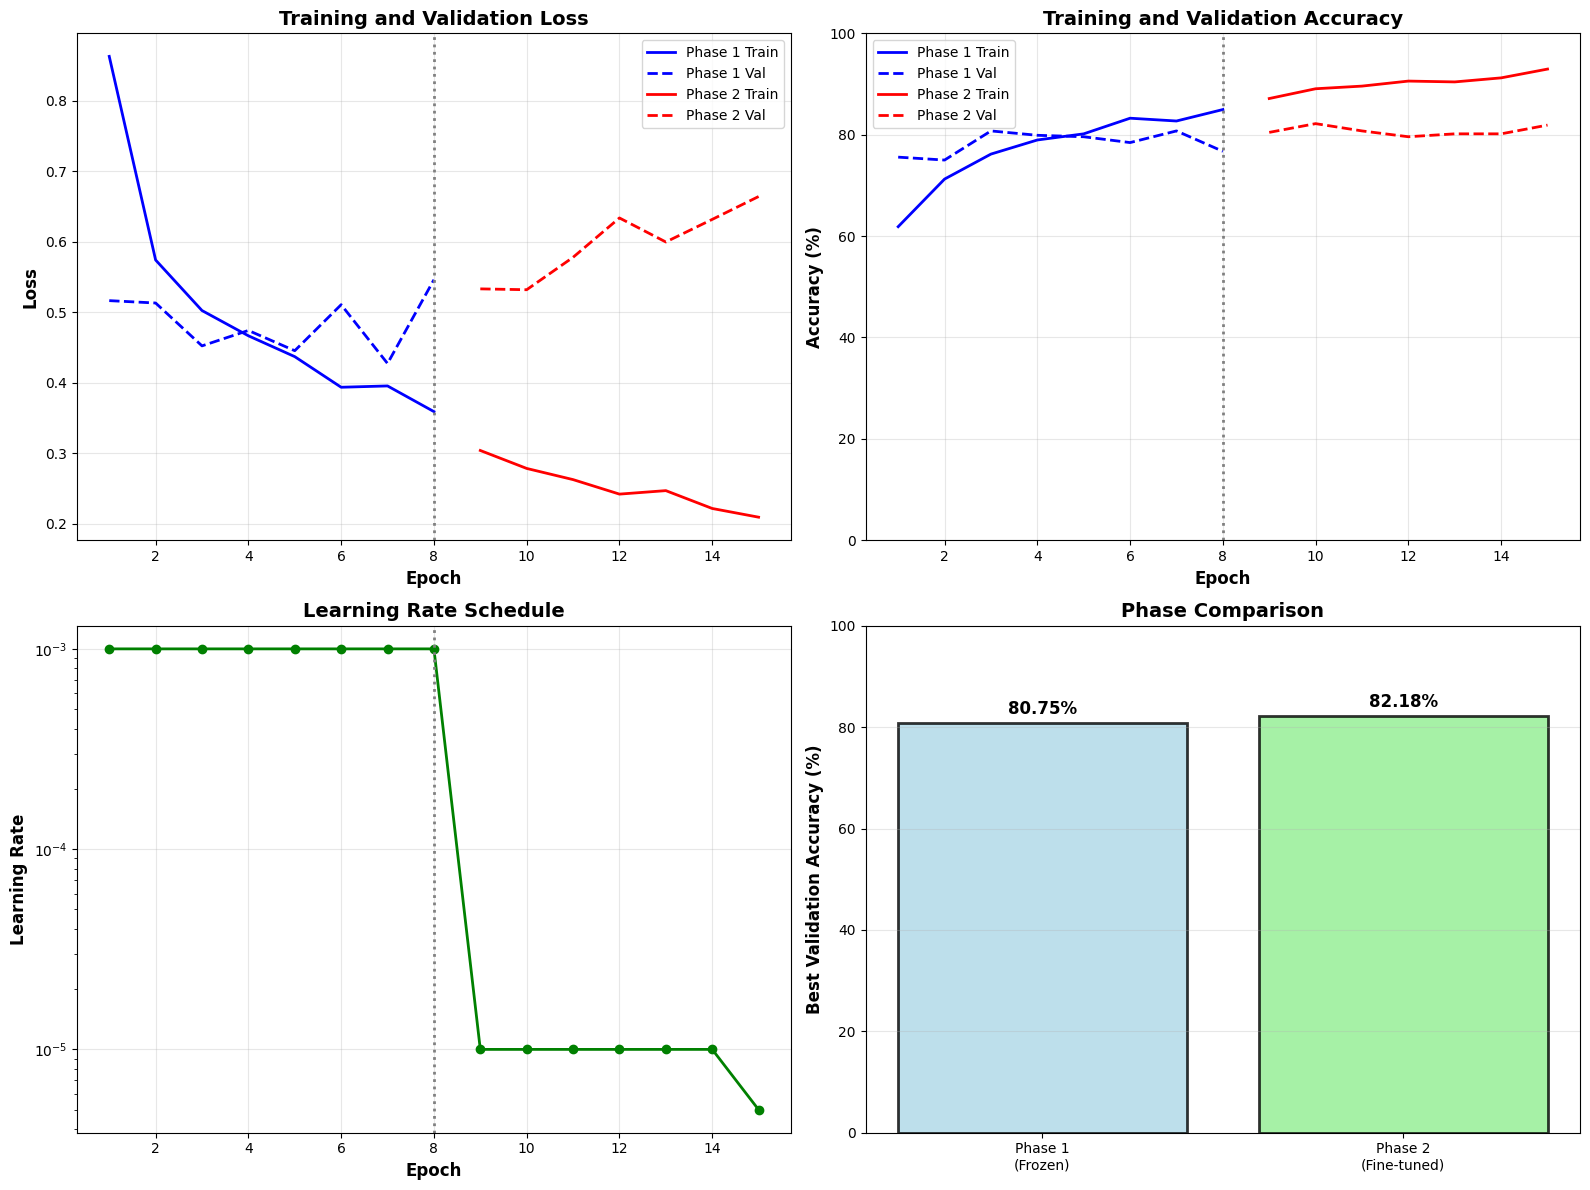


✅ Complete results saved: ./training_results/complete_training_results.json

COMPLETE TRAINING SUMMARY

Phase 1 (Frozen Layers):
  Best Val Accuracy: 0.8075 (80.75%)
  Test Accuracy: 0.7811 (78.11%)
  Precision: 0.7812
  Recall: 0.7811
  F1-Score: 0.7811

Phase 2 (Fine-tuned):
  Best Val Accuracy: 0.8218 (82.18%)
  Test Accuracy: 0.7692 (76.92%)
  Precision: 0.7773
  Recall: 0.7692
  F1-Score: 0.7670

Improvement:
  Val Accuracy: +1.44%
  Test Accuracy: +-1.18%


✅ Final model saved: ./checkpoints/final_model_complete.pth

🎉 TRAINING COMPLETE!

Final Test Accuracy: 0.7692 (76.92%)
All results saved in: ./training_results


In [67]:
# Run Fine-Tuning
import os
import sys
from pathlib import Path # Added for path normalization
import re # Added for robust string replacement

# Ensure project_dir and src_dir are defined for this cell's context
project_dir = Path('/content/bone_fracture_detection')
src_dir = project_dir / 'src' / 'bonefracture'

os.chdir(str(project_dir))
sys.path.insert(0, str(project_dir))

training_script = src_dir / 'run_complete_training.py'

if training_script.exists():
    print("="*80)
    print("STARTING DENSENET-121 FINE-TUNING")
    print("="*80)
    print("This will take ~1-2 hours for 20 epochs total (10+10)...")
    print("="*80)
    print()

    with open(training_script, 'r') as f:
        script_content = f.read()

    # Make sure pathlib is imported within the script content
    if 'from pathlib import Path' not in script_content:
        script_content = "from pathlib import Path\n" + script_content

    # Robustly find and replace DATASET_ROOT to ensure POSIX path string literal
    # This regex will match DATASET_ROOT = <whatever its current value is> and replace it
    script_content = re.sub(
        r"^(DATASET_ROOT\s*=\s*).*$", # Capture 'DATASET_ROOT = ' and match rest of line
        f"\\1r'{dataset_path.as_posix()}'", # Replace with new raw string literal
        script_content,
        flags=re.MULTILINE
    )

    # Robustly find and replace BATCH_SIZE using kernel's batch_size
    script_content = re.sub(
        r"^(BATCH_SIZE\s*=\s*)\d+",
        f"\\1{batch_size}",
        script_content,
        flags=re.MULTILINE
    )

    # Force DATASET_ROOT to be a POSIX path string when calling create_dataloaders
    # This replaces the entire line containing create_dataloaders to ensure the path is clean.
    script_content = re.sub(
        r"^(.*create_dataloaders\(root_dir=)DATASET_ROOT(.*)$",
        r"\\1Path(DATASET_ROOT).as_posix()\\2",
        script_content,
        flags=re.MULTILINE
    )

    # Execute the modified training script
    # Use globals() and locals() to provide a context for exec
    exec(script_content, globals(), locals())
else:
    print("⚠️  run_complete_training.py not found!")
    print("Please upload it in Step 3")


In [ ]:
## Step 6: View Results & Download Models


TRAINING RESULTS


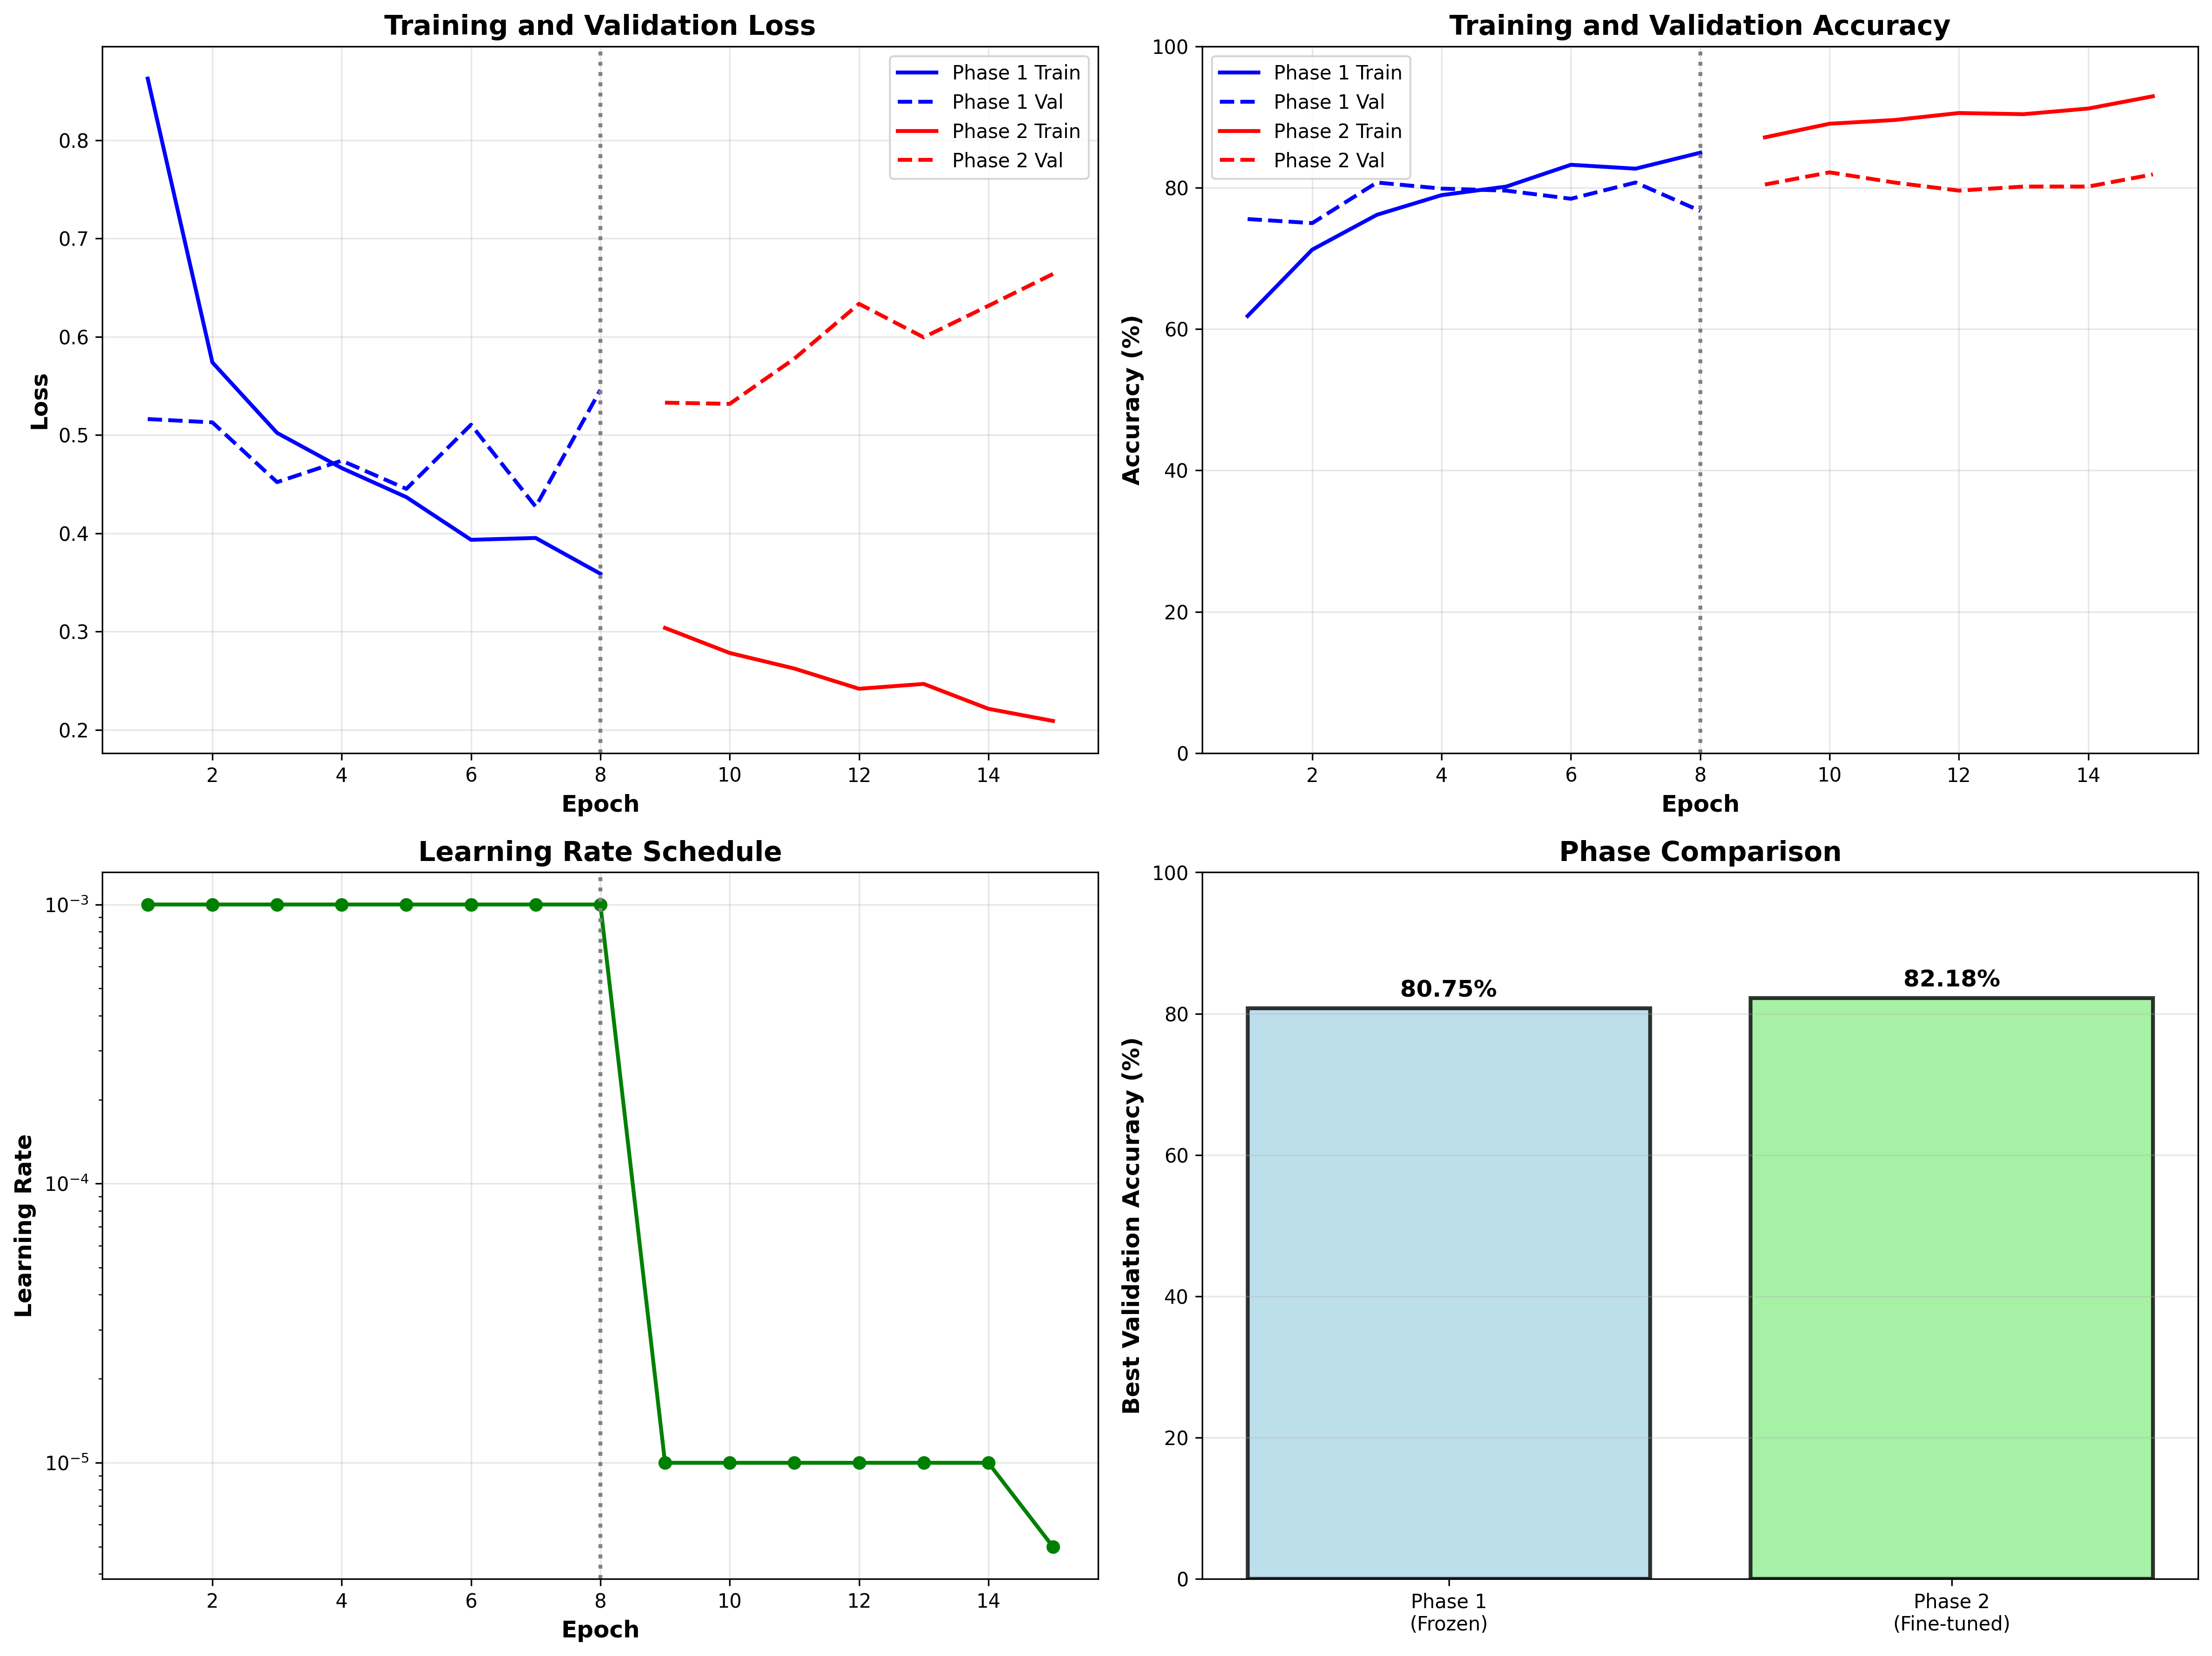

✅ Training history plot displayed!

📥 Downloading models...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ Downloaded: best_model_phase_1.pth


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ Downloaded: best_model_phase_2.pth


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ Downloaded: final_model_complete.pth


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ Training results JSON downloaded!

📊 Final Results Summary:
⚠️  Could not parse results: Unknown format code 'f' for object of type 'str'


In [68]:
# Display Results and Download Models
from IPython.display import Image, display
from pathlib import Path
from google.colab import files
import json

results_dir = project_dir / 'training_results'
checkpoints_dir = project_dir / 'checkpoints'

print("="*80)
print("TRAINING RESULTS")
print("="*80)

# Display training history plot
history_plot = results_dir / 'complete_training_history.png'
if history_plot.exists():
    display(Image(str(history_plot)))
    print("✅ Training history plot displayed!")
else:
    print("⚠️  Training history plot not found yet (may still be generating)")

# Download best models
models_to_download = [
    checkpoints_dir / 'best_model_phase_1.pth',
    checkpoints_dir / 'best_model_phase_2.pth',
    checkpoints_dir / 'final_model_complete.pth'
]

print("\n📥 Downloading models...")
downloaded_count = 0
for model_path in models_to_download:
    if model_path.exists():
        files.download(str(model_path))
        print(f"✅ Downloaded: {model_path.name}")
        downloaded_count += 1
    else:
        print(f"⚠️  Not found: {model_path.name}")

if downloaded_count == 0:
    print("⚠️  No models found. Training may still be in progress.")

# Download training results JSON
results_json = results_dir / 'complete_training_results.json'
if results_json.exists():
    files.download(str(results_json))
    print("✅ Training results JSON downloaded!")

    # Display results summary
    try:
        with open(results_json, 'r') as f:
            results = json.load(f)
        print("\n📊 Final Results Summary:")
        print(f"  Phase 1 Best Val Accuracy: {results.get('phase1_best_val_acc', 'N/A'):.4f}")
        print(f"  Phase 2 Best Val Accuracy: {results.get('phase2_best_val_acc', 'N/A'):.4f}")
        print(f"  Final Test Accuracy: {results.get('final_test_acc', 'N/A'):.4f}")
    except Exception as e:
        print(f"⚠️  Could not parse results: {e}")
else:
    print("⚠️  Training results JSON not found yet (may still be generating)")

print("="*80)
